In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
# add parent directory so we can use scripts we create in this repo
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd())))

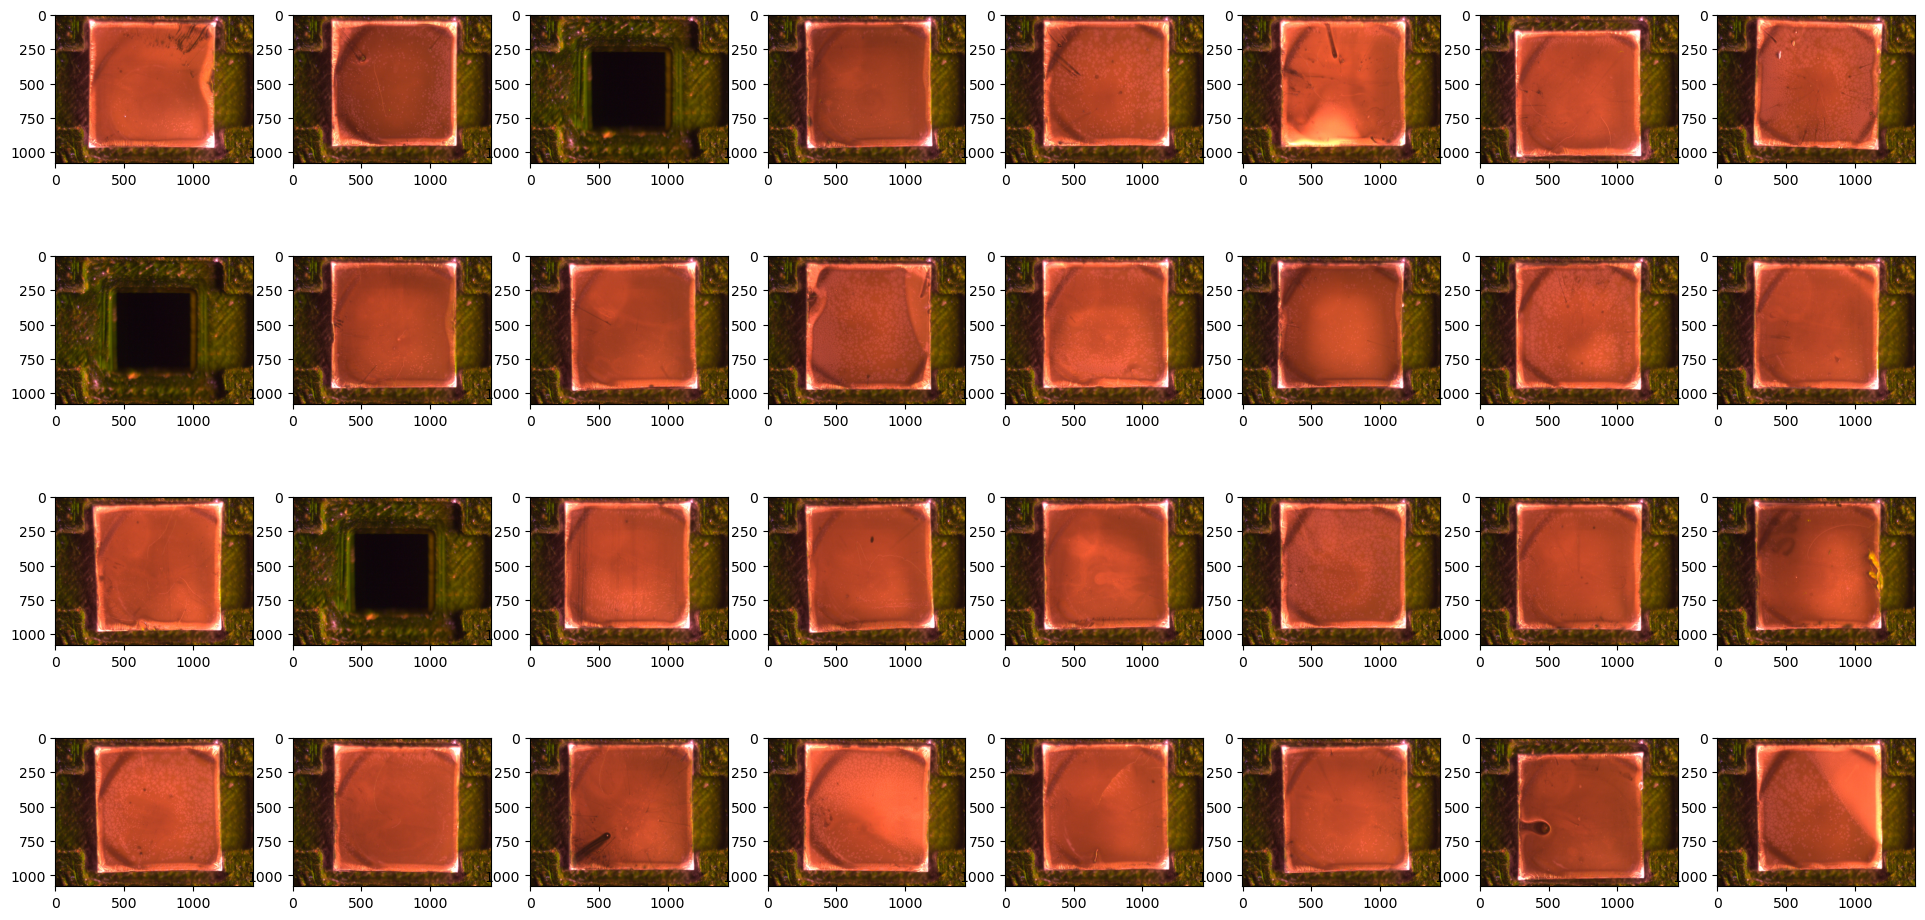

In [4]:
# view whole batch of pl images

vert = 4
horiz = 8
embiggen = 3
item = 0

blank = pl.iloc[0] * 0

fig, ax = plt.subplots(vert, horiz, figsize = (horiz*embiggen, vert*embiggen), constrained_layout=False)

for n in range(vert):
    for k in range(horiz):
        if item < len(pl):
            img = pl.iloc[item]
            ax[n,k].imshow(img)

        else:
            ax[n,k].imshow(blank)
            
        item += 1


In [199]:
import cv2
def ff(img):
    img = img.copy()
    w, h = 1440, 1080
    center = (h//2, w//2)
    mask = np.zeros((h+2, w+2), np.uint8)
    rect = None
    return cv2.floodFill(img, mask, center, 255, (200, 10, 10), (200, 52, 200))

(0, 0, 1440, 1080)


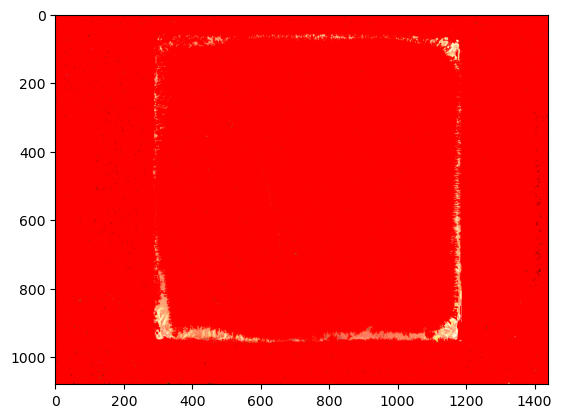

In [203]:


_, img, mask, rect = ff(pl.iloc[1])
print(rect)
plt.imshow(img)
# plt.imshow(pl.iloc[1])

In [204]:
%load_ext autoreload
%autoreload 2
from test_crop import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[   0.    0.]
 [1439.    0.]
 [   0. 1079.]
 [1439. 1079.]]
0 Width and length are too different in magnitude, is 1439.0 vs 1079.0
[[   0.    0.]
 [1439.    0.]
 [1439. 1079.]
 [   0. 1079.]]
1552681.0
0 Crop region is too large, is 1552681.0 pixels
[[   0.    0.]
 [1439.    0.]
 [   0. 1079.]
 [1439. 1079.]]
1 Width and length are too different in magnitude, is 1439.0 vs 1079.0
[[   0.    0.]
 [1439.    0.]
 [1439. 1079.]
 [   0. 1079.]]
1552681.0
1 Crop region is too large, is 1552681.0 pixels
[[   0.    0.]
 [1439.    0.]
 [   0. 1079.]
 [1439. 1079.]]
2 Width and length are too different in magnitude, is 1439.0 vs 1079.0
[[   0.    0.]
 [1439.    0.]
 [1439. 1079.]
 [   0. 1079.]]
1552681.0
2 Crop region is too large, is 1552681.0 pixels
[[   0.    0.]
 [1439.    0.]
 [   0. 1079.]
 [1439. 1079.]]
3 Width and length are too different in magnitude, is 1439.0 vs 1079.0
[[   0.    0.]
 [1439.    0.]
 [1439. 1079.]
 [   0. 1079.]]
1552681.0
3 Crop region is too large, is 1552681.0 pix

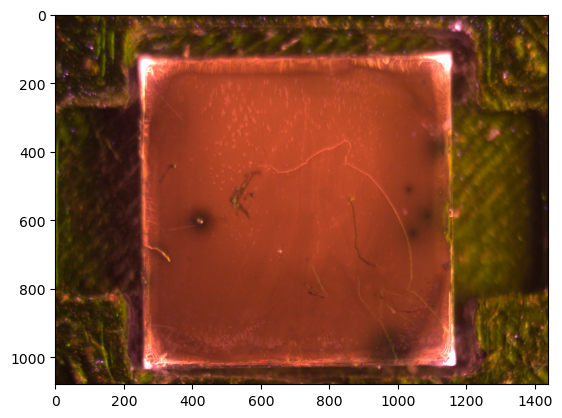

In [6]:
square_fail = []
area_fail = []

for i, img in enumerate(pl):
    try:
        test_crop_is_square(img)
    except AssertionError as e:
        square_fail.append(i)
        print(i, e)
    
    try:
        test_crop_correct_area(img)
    except AssertionError as e:
        area_fail.append(i)
        print(i, e)


In [7]:
print(square_fail)
print(area_fail)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


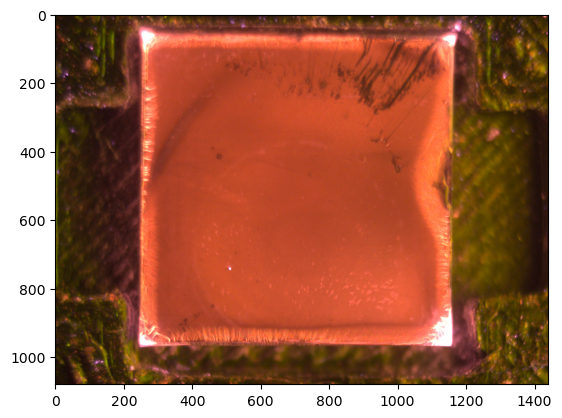

In [26]:
plt.imshow(pl.iloc[0])

[[255 255 255 ... 255 255 255]
 [255 255 255 ...   0 255 255]
 [255 255 255 ... 255   0 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


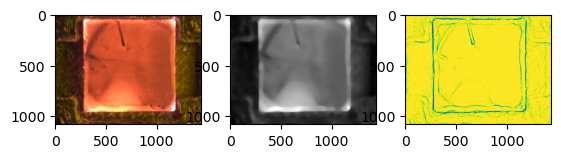

In [111]:
import cv2
img = pl.iloc[5]

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.medianBlur(gray, 57)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 1)

# _, thresh = cv2.threshold(thresh, 240, 255, cv2.THRESH_BINARY)
print(thresh)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img)
ax[1].imshow(gray, cmap='gray')
ax[2].imshow(thresh,)

# plt.imshow(pl.iloc[0])

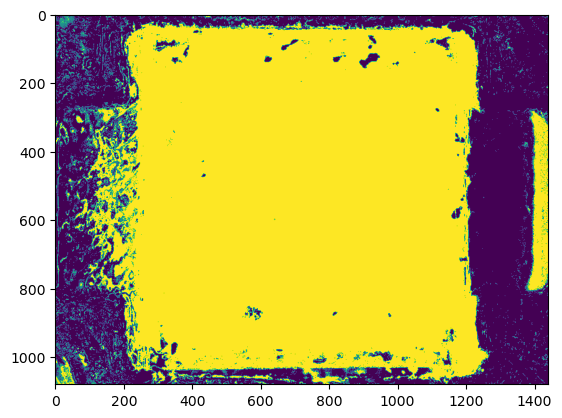

In [125]:
x = pl.iloc[0]
for i in range(1, len(pl)):
    x = cv2.bitwise_and(pl.iloc[i], x)

gray = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
_, s = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY_INV)
plt.imshow(x)
plt.imshow(s)

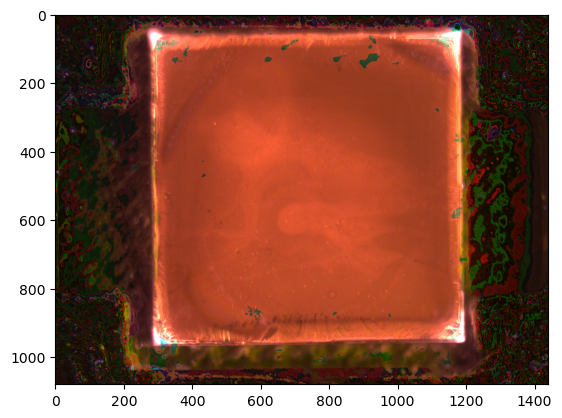

In [95]:
plt.imshow(pl.iloc[20] - x)

# Preprocess images data

In [2]:
# directory to load our pl images
chardir = [
    '20221011_B9-char_1',
    '20221015_B10-char',
    '20221020_B11-char',
    '20221025_B12-char',
    ]
chardir = [f'../../data/output/{file}/Characterization' for file in chardir]

# batch names
batchnames = [
    'B9',
    'B10',
    'B11',
    'B12'
]

# bad images to exclude
exclude = [
    [],
    [],
    [11,12,13,14,15,16,17,18,19,20,21,22,23],
    [24]
]

list(zip(batchnames, chardir, exclude))

[('B9', '../../data/output/20221011_B9-char_1/Characterization', []),
 ('B10', '../../data/output/20221015_B10-char/Characterization', []),
 ('B11',
  '../../data/output/20221020_B11-char/Characterization',
  [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
 ('B12', '../../data/output/20221025_B12-char/Characterization', [24])]

In [90]:
# load and crop pl images


from frgpascal.analysis.processing import load_all
from crop import _crop_pl_old
from natsort import index_natsorted


# downscale images for training
w, h = (1440//8, 1080//8)

def load_all_sorted(chardir):
	metricdf, rawdf = load_all(
		chardir,
		t_kwargs=dict(
			wlmin=700,
			wlmax=900
		)
	)
	rawdf= rawdf.sort_values(
   		by='name',
   		key=lambda x: np.argsort(index_natsorted(rawdf['name']))
    )
	rawdf = rawdf.reset_index(drop=True)


	metricdf= metricdf.sort_values(
    	by='name',
    	key=lambda x: np.argsort(index_natsorted(metricdf['name']))
    )
	metricdf = metricdf.reset_index(drop=True)
	return metricdf, rawdf

def prepare_pl(chardir):
	_, rawdf = load_all_sorted(chardir)
	pl = np.stack(rawdf.filter(like='plimg', axis=1).to_numpy().flatten())
	print(pl.shape)

	df = pd.DataFrame([], columns=['raw', 'pl', 'corners'])
	for i in range(len(pl)):
		img = pl[i]
		crop_img, corners = _crop_pl_old(np.uint8(img * 255), output_shape=None)
		df = df.append({'raw': img, 'pl': crop_img, 'corners': corners}, ignore_index=True)
	
	return df

In [91]:
# now produce the cropped pl images (outputs)

import pickle

LOAD_FROM_FILE = True

if LOAD_FROM_FILE:
	print('Loading from file')
	with open('cropped.pkl', 'rb') as f:
		pl = pickle.load(f)
else:
	print('Computing crops')
	# compute the crops
	pl = pd.DataFrame([])
	for b, dir in zip(batchnames, chardir):
		print(f'----{dir}----')
		df = pd.DataFrame(prepare_pl(dir))
		df['batch'] = b
		df = df.reset_index().rename(columns={'index': 'name'})
		pl = pd.concat([pl, df])

	print('Saving to file')
	with open('cropped.pkl', 'wb') as f:
		pickle.dump(pl, f)

pl.head(3)

Computing crops
----../../data/output/20221011_B9-char_1/Characterization----


Loading data:   0%|          | 0/31 [00:00<?, ?sample/s]/home/kcw/Documents/fenning-lab/PASCAL/frgpascal/analysis/processing.py:105: RuntimeWarning: invalid value encountered in log10
  a = -np.log10(t)
Loading data:  13%|█▎        | 4/31 [00:05<00:37,  1.39s/sample]/home/kcw/Documents/fenning-lab/PASCAL/frgpascal/analysis/processing.py:105: RuntimeWarning: divide by zero encountered in log10
  a = -np.log10(t)
Loading data: 100%|██████████| 31/31 [00:48<00:00,  1.55s/sample]


(31, 1080, 1440, 3)
----../../data/output/20221015_B10-char/Characterization----


Loading data: 100%|██████████| 31/31 [00:41<00:00,  1.33s/sample]


(31, 1080, 1440, 3)
----../../data/output/20221020_B11-char/Characterization----


Loading data: 100%|██████████| 32/32 [00:46<00:00,  1.44s/sample]


(32, 1080, 1440, 3)
----../../data/output/20221025_B12-char/Characterization----


Loading data: 100%|██████████| 32/32 [00:47<00:00,  1.49s/sample]


(32, 1080, 1440, 3)
Saving to file


name                                                raw  \
0      0  [[[0.81152344, 0.61328125, 0.0], [0.85058594, ...   
1      1  [[[0.76953125, 0.60253906, 0.0], [0.8359375, 0...   
2      2  [[[0.7792969, 0.61328125, 0.0], [0.8466797, 0....   
3      3  [[[0.81347656, 0.6123047, 0.0], [0.85839844, 0...   
4      4  [[[0.77441406, 0.6074219, 0.0], [0.8378906, 0....   
..   ...                                                ...   
27    27  [[[0.9824219, 0.6982422, 0.10449219], [0.99804...   
28    28  [[[0.9716797, 0.69140625, 0.09082031], [0.9980...   
29    29  [[[0.96875, 0.7080078, 0.12109375], [0.9980469...   
30    30  [[[0.9580078, 0.6875, 0.022460938], [0.9980469...   
31    31  [[[0.97753906, 0.7109375, 0.15722656], [0.9980...   

                                                   pl  \
0   [[[254, 254, 254], [254, 254, 254], [254, 254,...   
1   [[[254, 254, 254], [254, 254, 254], [254, 254,...   
2   [[[254, 254, 254], [254, 254, 254], [254, 254,...   
3   [[[254, 254, 199], [254, 254, 200], [254, 254,...   
4   [[[254, 254, 254], [254, 254, 254], [246, 246,...   
..                                                ...   
27  [[[254, 254, 254], [254, 254, 254], [254, 253,...   
28  [[[254, 254, 254], [254, 254, 254], [254, 254,...   
29  [[[254, 254, 254], [254, 254, 254], [254, 254,...   
30  [[[254, 254, 254], [254, 254, 254], [254, 254,...   
31  [[[254, 254, 254], [254, 254, 254], [254, 254,...   

                                              corners batch  
0   [[281.0, 0.0], [1146.0, 0.0], [1146.0, 874.0],...    B9  
1   [[293.0, 47.0], [1152.0, 7.0], [1194.0, 908.0]...    B9  
2   [[284.0, 849.0], [284.0, 0.0], [1149.0, 0.0], ...    B9  
3   [[284.0, 878.0], [287.0, -3.0], [1152.0, 0.0],...    B9  
4   [[296.0, 0.0], [1159.0, -8.0], [1167.0, 849.0]...    B9  
..                                                ...   ...  
27  [[323.0, 91.0], [1168.0, 77.0], [1183.0, 946.0...   B12  
28  [[312.0, 150.0], [1176.0, 126.0], [1200.0, 100...   B12  
29  [[313.0, 70.0], [1160.0, 52.0], [1178.0, 932.0...   B12  
30  [[287.0, 126.0], [1141.0, 124.0], [1143.0, 102...   B12  
31  [[328.0, 73.0], [1173.0, 73.0], [1173.0, 952.0...   B12  

[126 rows x 5 columns]

In [162]:
# exclude the bad crops
pl['name'] = pl['name'].convert_dtypes()

# create mask to exclude
to_exclude = np.zeros(len(pl))
for b, ex in zip(batchnames, exclude):
    to_exclude = to_exclude | ( (pl['batch'] == b) & (pl['name'].isin(ex)) )
pl = pl[~to_exclude]

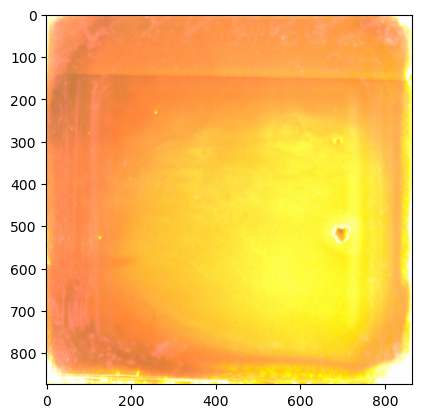

In [163]:
plt.imshow(pl['pl'].iloc[0])

(1080, 1440, 3)


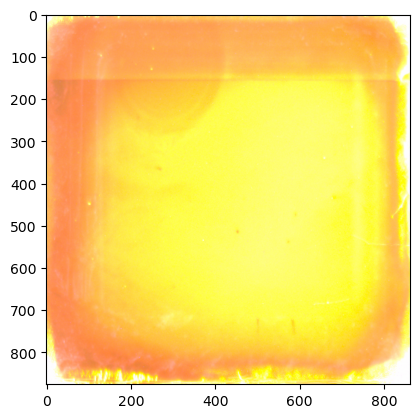

In [164]:
print(pl['raw'].iloc[10].shape)
plt.imshow(pl['pl'].iloc[10])

# ML Model

In [203]:
import tensorflow as tf
from tensorflow.keras import layers

# let's create a model to predict crop boundaries
# input: downscaled image (fewer pixels so lower compute cost)
# output: 4 xy coordinates, representing the corners of the crop
# loss function: euclidean distance for each of 4 output points
# + maybe per-pixel loss on the cropped image?

# downscale images
w, h = (1440//8, 1080//8)
print(w, h)

model = tf.keras.Sequential([
    # convolutional layers ("latent space")
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(h, w, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # flatten it out
    layers.Flatten(),
    layers.Dense(32, activation='relu'),

    # output layer: 4 xy coordinates
    layers.Dense(8),
    layers.Reshape((4,2))
    ])

model.summary()

180 135
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 133, 178, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 66, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 87, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 41, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 78720)    

In [204]:
from tensorflow.keras import losses

def loss(y_true, y_pred):
    # loss for 4 xy coordinate prediction
    # is the sum of squared error for each of the 4 points
    ls = []

    # compute squared euclidean distance error for each of 4 corners
    for i in range(4):
        l = (y_true[:, i, :] - y_pred[:, i, :])
        l = tf.square(l[:, 0]) + tf.square(l[:, 1])
        # print(l)
        
        ls.append(l)
    
    # now sum the squared euclidean distance error for each of 4 corners
    sum = tf.reduce_sum(ls, axis=0) # shape (n,)
    # print(sum)
    
    return tf.reduce_mean(sum)



model.compile(optimizer='adam', loss=loss)
    

In [205]:
# test out the loss function

y_true = np.stack(pl['corners'].iloc[0:3].to_numpy())
print(y_true)

y_pred = np.zeros_like(y_true)
print(y_pred)

loss(y_true, y_pred)

[[[ 281.    0.]
  [1146.    0.]
  [1146.  874.]
  [ 281.  874.]]

 [[ 293.   47.]
  [1152.    7.]
  [1194.  908.]
  [ 335.  948.]]

 [[ 284.  849.]
  [ 284.    0.]
  [1149.    0.]
  [1149.  849.]]]
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]]


<tf.Tensor: shape=(), dtype=float32, numpy=4410620.5>

In [206]:
import cv2

def downsize(img):
    img = np.uint8(img * 255)
    return cv2.resize(img, (w, h))

x_train = np.stack(pl['raw'].apply(lambda img: downsize(img)).to_numpy())
y_train = np.stack(pl['corners'].to_numpy())

print(x_train.shape, y_train.shape)

(112, 135, 180, 3) (112, 4, 2)


In [207]:
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
4/4 [==============================] - 2s 450ms/step - loss: 2573143.2500
Epoch 2/30
4/4 [==============================] - 2s 488ms/step - loss: 1022522.6875
Epoch 3/30
4/4 [==============================] - 2s 385ms/step - loss: 750100.9375
Epoch 4/30
4/4 [==============================] - 2s 395ms/step - loss: 702176.1875
Epoch 5/30
4/4 [==============================] - 2s 408ms/step - loss: 685615.0000
Epoch 6/30
4/4 [==============================] - 2s 393ms/step - loss: 663251.6250
Epoch 7/30
4/4 [==============================] - 2s 402ms/step - loss: 656790.5625
Epoch 8/30
4/4 [==============================] - 2s 367ms/step - loss: 648706.5625
Epoch 9/30
4/4 [==============================] - 1s 331ms/step - loss: 643302.5625
Epoch 10/30
4/4 [==============================] - 1s 319ms/step - loss: 647874.1250
Epoch 11/30
4/4 [==============================] - 1s 322ms/step - loss: 625474.6250
Epoch 12/30
4/4 [==============================] - 1s 362ms/step - loss:

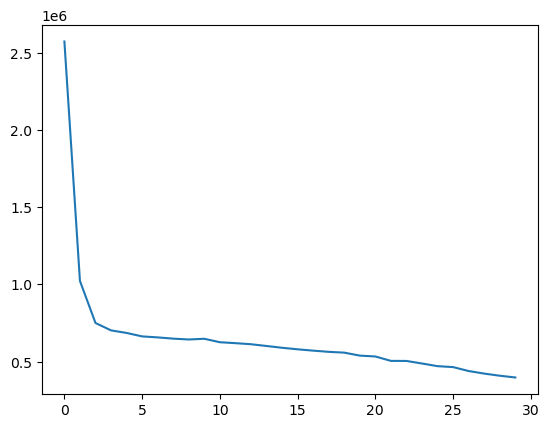

In [208]:
plt.plot(history.history['loss'])

1/1 [==============================] - 0s 29ms/step
[[[ 314.85727  474.37183]
  [ 519.29425  140.01042]
  [1102.091    411.5124 ]
  [ 659.7937   763.72534]]]
[[ 281.    0.]
 [1146.    0.]
 [1146.  874.]
 [ 281.  874.]]


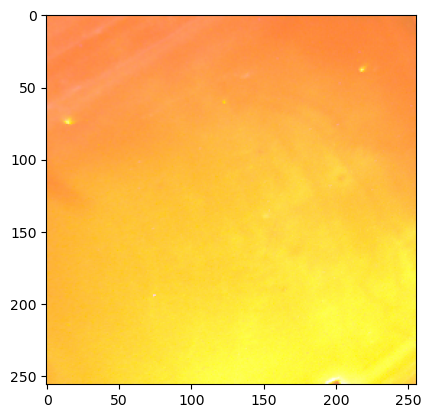

In [224]:
# now show crop results

def crop_raw(img, corners, output_shape):
    output_pts = np.array([
        [0,0],
        [output_shape[0], 0],
        [output_shape[0], output_shape[1]],
        [0, output_shape[1]],
        ], np.float32)
    
    M = cv2.getPerspectiveTransform(corners, output_pts) # needs float32 arrays
    out = cv2.warpPerspective(img, M, output_shape, flags=cv2.INTER_LINEAR)
    return out

i = 0

corners_pred = model.predict(x_train[np.newaxis, i])
print(corners_pred)
print(y_train[i])



imgc = crop_raw(pl['raw'].iloc[i], corners_pred, (256, 256))
plt.imshow(imgc)